In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


In [2]:
df = pd.read_csv("./FakeNewsNet.csv")

In [3]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [4]:
df.shape

(23196, 5)

In [5]:
df.isnull().sum()

title              0
news_url         330
source_domain    330
tweet_num          0
real               0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.duplicated().sum()

136

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(22730, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22730 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          22730 non-null  object
 1   news_url       22730 non-null  object
 2   source_domain  22730 non-null  object
 3   tweet_num      22730 non-null  int64 
 4   real           22730 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


In [11]:
df2 = df.copy()
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes.name == "object":
        df[i] = le.fit_transform(df[i])


In [12]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,10145,1833,972,42,1
1,14894,16046,2259,0,1
2,17402,11246,1435,63,1
3,4882,9889,1354,20,1
4,7046,17651,2419,38,1


In [13]:
df["real"].value_counts()

1    17327
0     5403
Name: real, dtype: int64

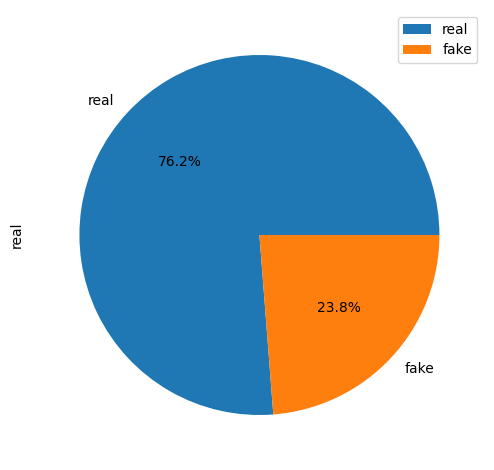

In [14]:
df["real"].value_counts().plot.pie(autopct="%.1f%%", labels=["real", "fake"], legend=True)
plt.tight_layout()
plt.show()

In [15]:
df.columns

Index(['title', 'news_url', 'source_domain', 'tweet_num', 'real'], dtype='object')

In [16]:
df2.describe(exclude="number").T

,count,unique,top,freq
title,22730,21398,Connecting People Through News,20
news_url,22730,21658,https://www.thewrap.com/this-is-us-everything-...,11
source_domain,22730,2441,people.com,1779


In [17]:
df.corr()

,title,news_url,source_domain,tweet_num,real
title,1.000000,-0.022065,-0.008413,0.007156,0.036439
news_url,-0.022065,1.000000,0.690622,-0.029400,-0.424553
source_domain,-0.008413,0.690622,1.000000,-0.005790,0.014212
tweet_num,0.007156,-0.029400,-0.005790,1.000000,-0.054677
real,0.036439,-0.424553,0.014212,-0.054677,1.000000


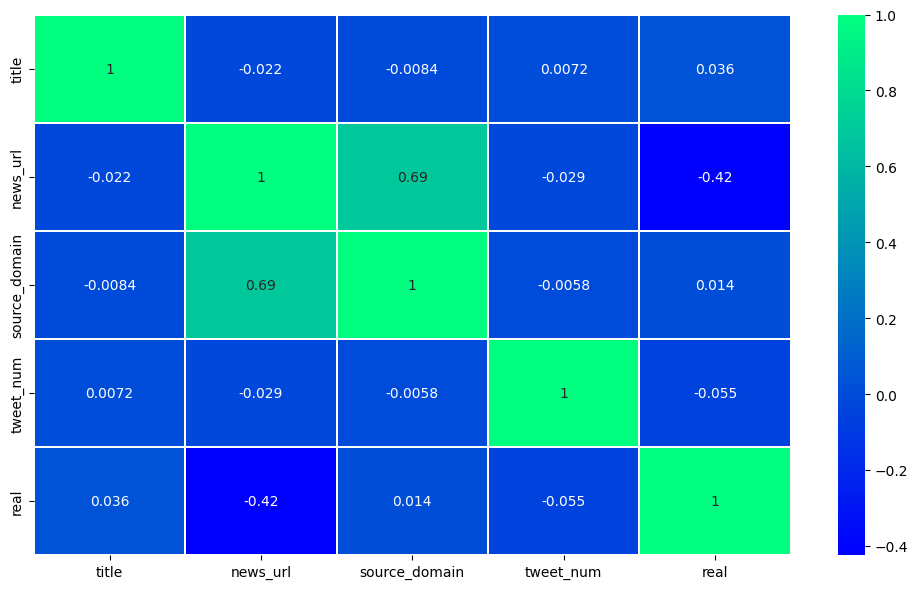

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, linewidths=0.2, linecolor="white", cmap="winter")
plt.tight_layout()
plt.show()

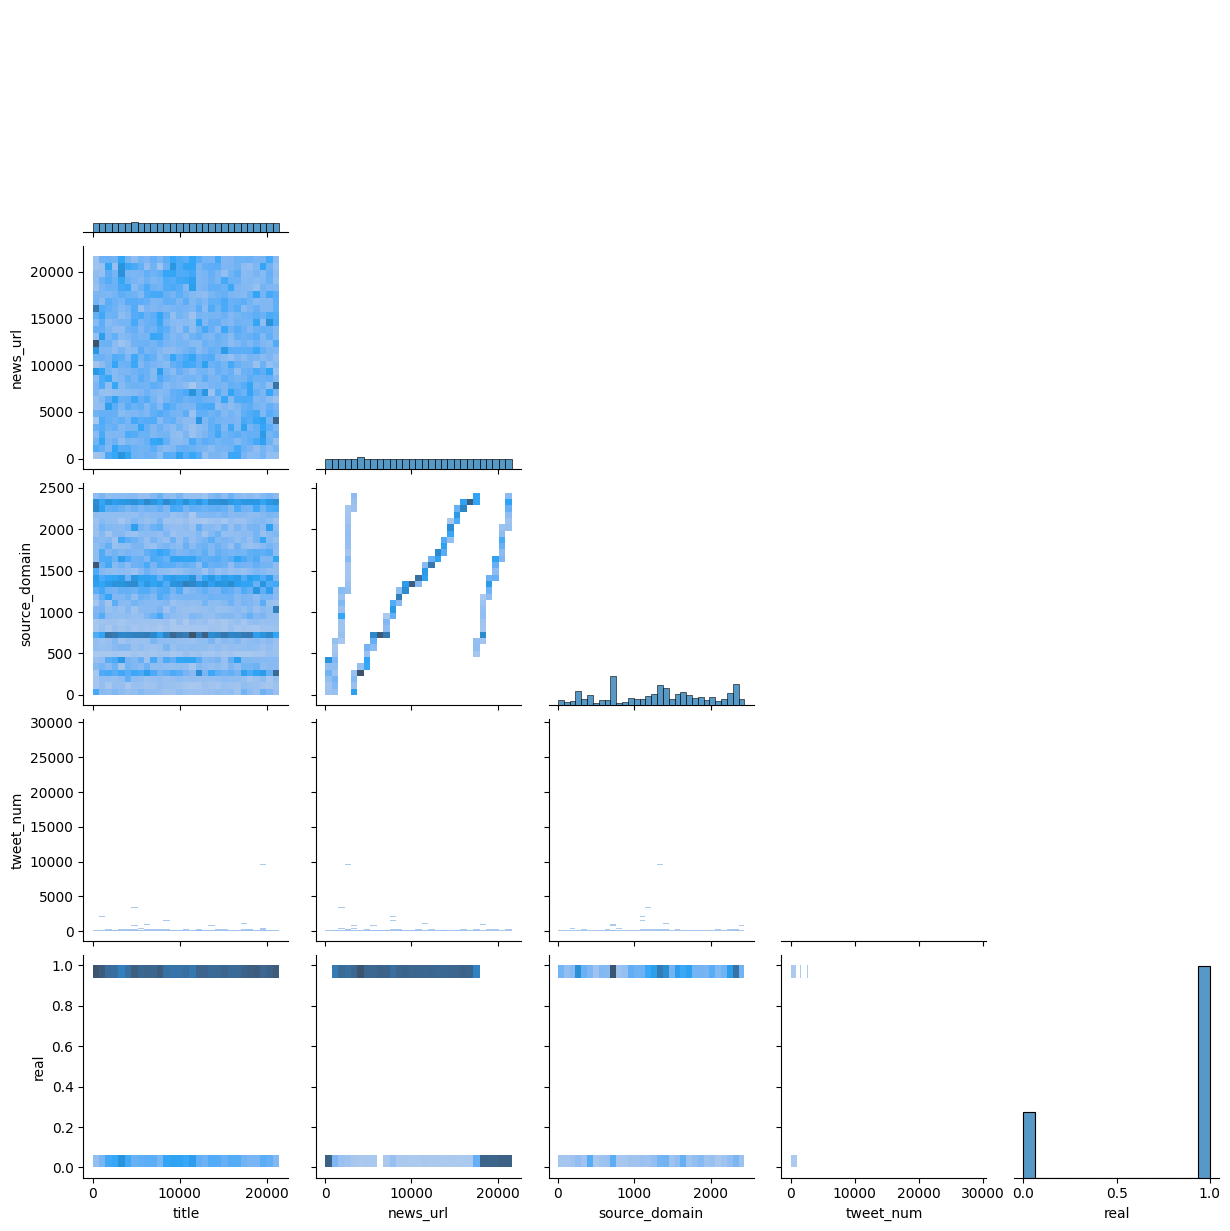

In [19]:
sns.pairplot(df, corner=True, kind="hist")

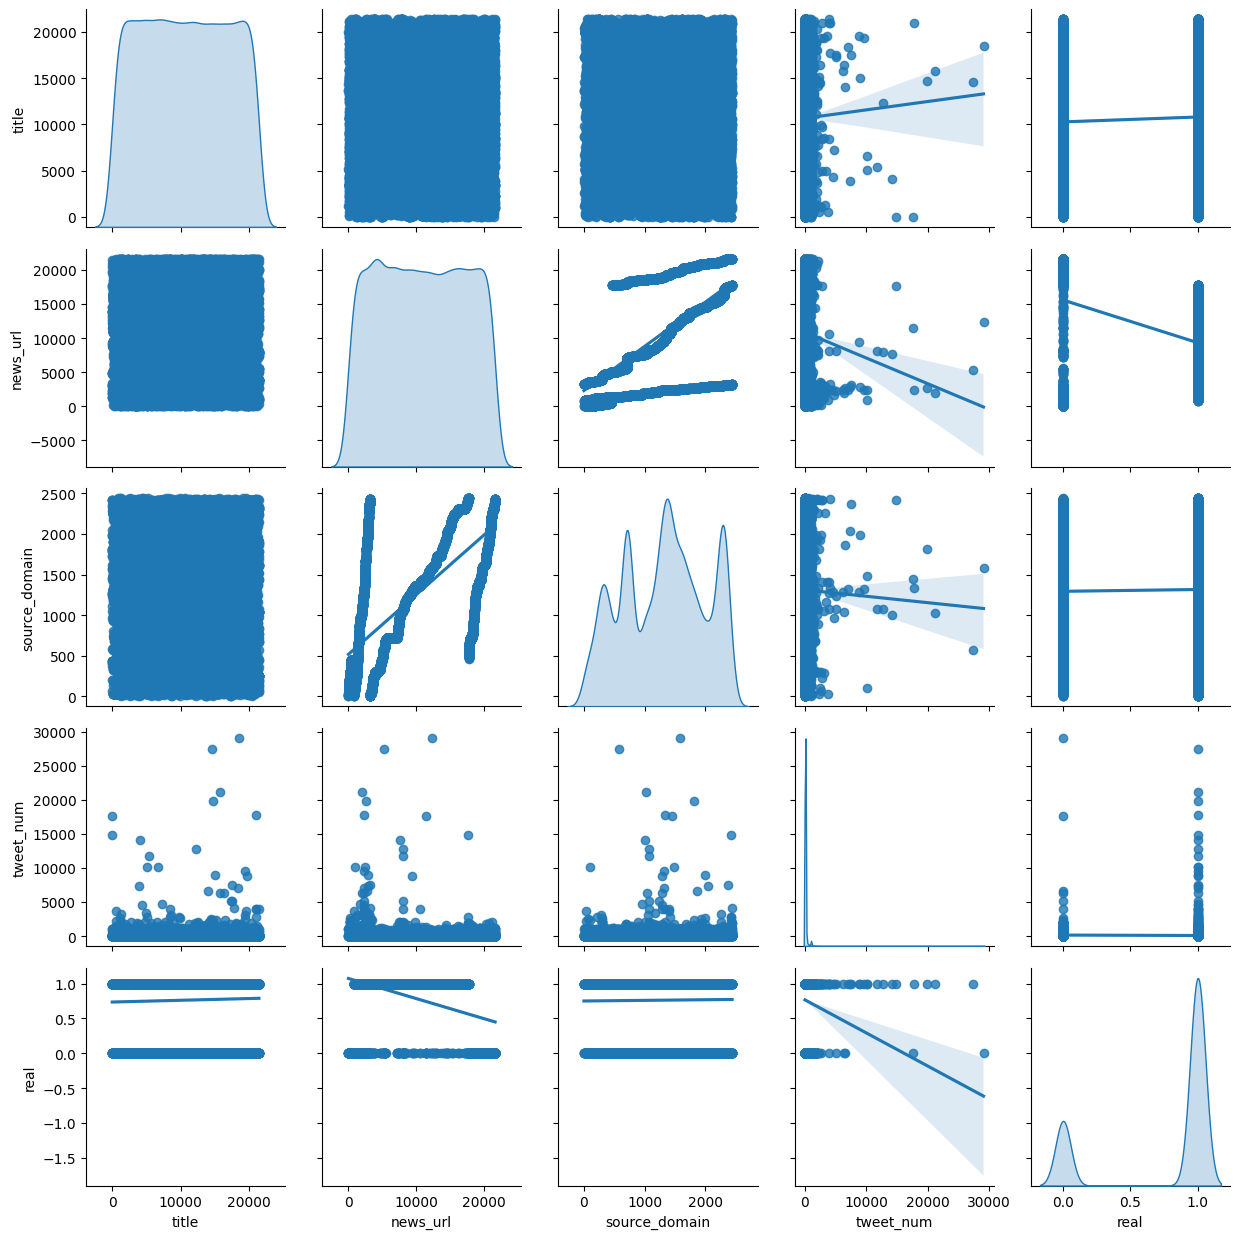

In [20]:
sns.pairplot(df, kind="reg", diag_kind="kde")
plt.tight_layout()
plt.show()

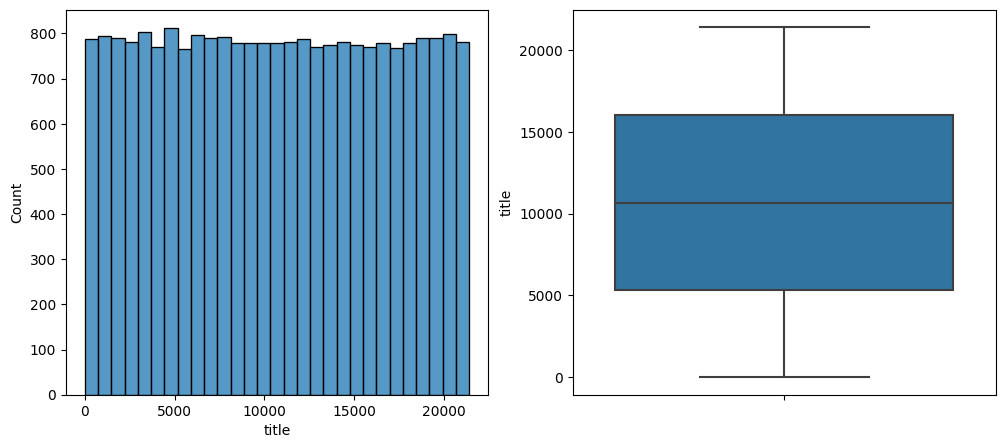

In [21]:
# univariate analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.iloc[:, 0])
plt.subplot(1, 2, 2)
sns.boxplot(y=df.iloc[:, 0])
plt.show()

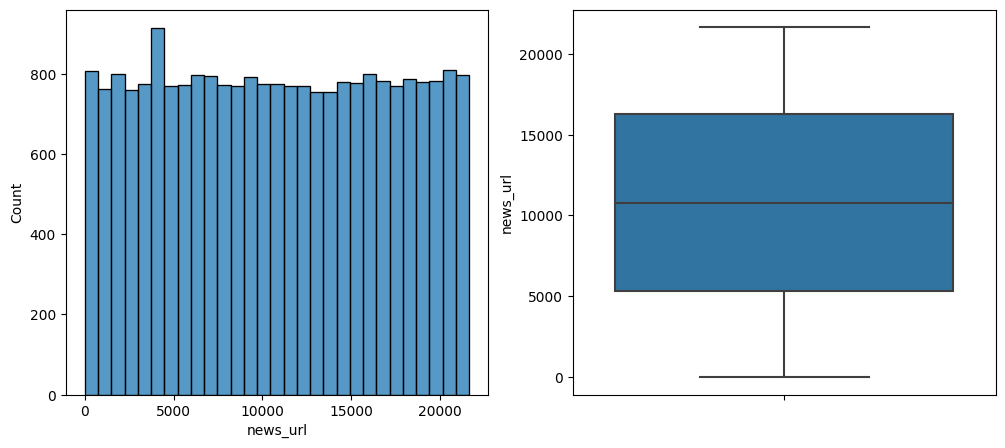

In [22]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.iloc[:, 1])
plt.subplot(1, 2, 2)
sns.boxplot(y=df.iloc[:, 1])
plt.show()

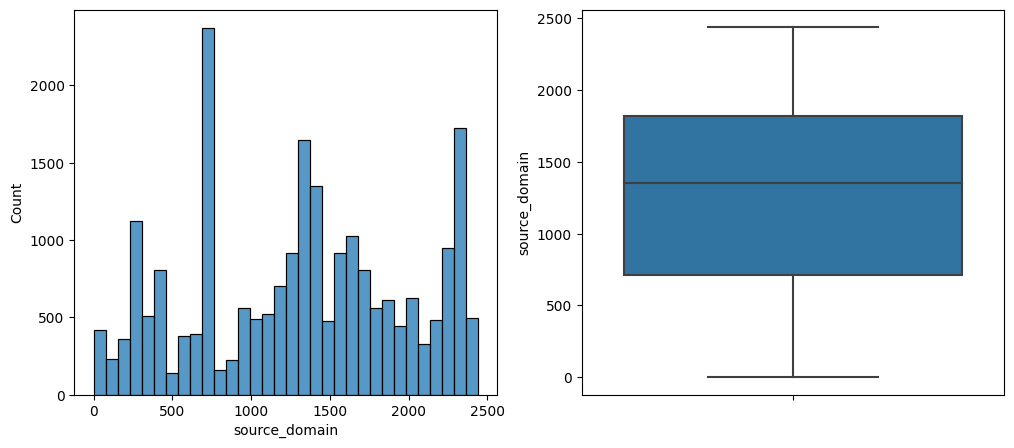

In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.iloc[:, 2])
plt.subplot(1, 2, 2)
sns.boxplot(y=df.iloc[:, 2])
plt.show()

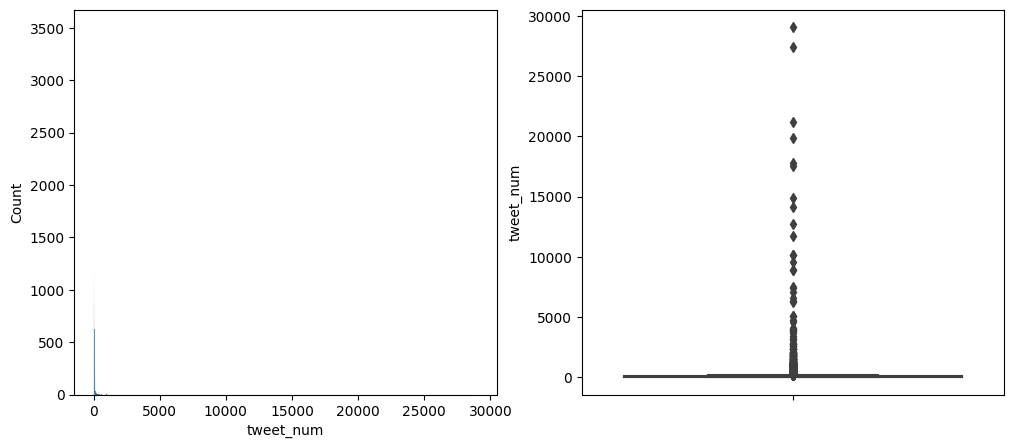

In [24]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.iloc[:, 3])
plt.subplot(1, 2, 2)
sns.boxplot(y=df.iloc[:, 3])
plt.show()

<AxesSubplot: >

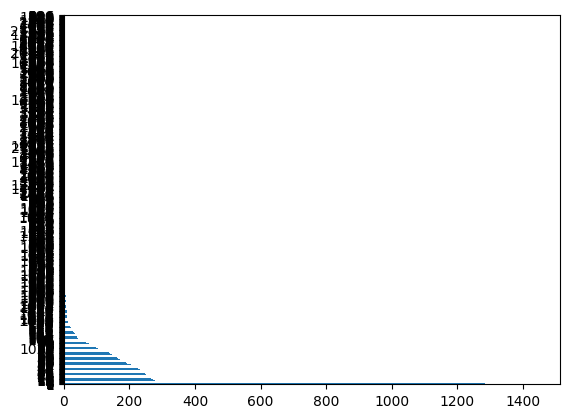

In [25]:
df["tweet_num"].value_counts().plot.barh()

In [26]:
df["tweet_num"].value_counts()

0       1442
1       1286
2        449
5        331
3        320
        ... 
688        1
1529       1
948        1
996        1
596        1
Name: tweet_num, Length: 810, dtype: int64

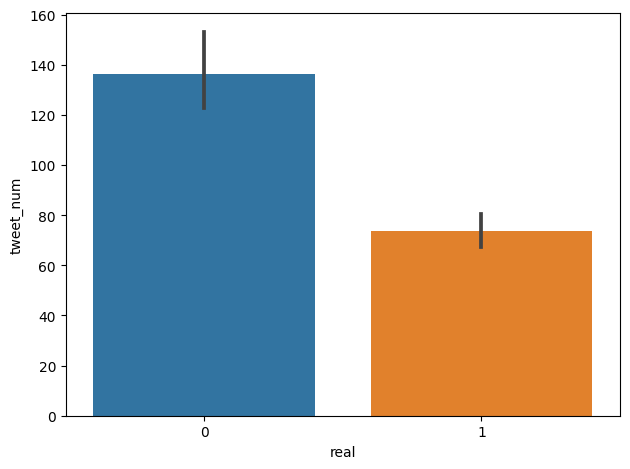

In [27]:
# Bivariate Analysis
sns.barplot(data=df, x="real", y="tweet_num")
plt.tight_layout()
plt.show()

In [28]:
X = df.drop("real", axis=1)
y = df["real"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18184, 4) (4546, 4) (18184,) (4546,)


In [30]:
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)

SVC()

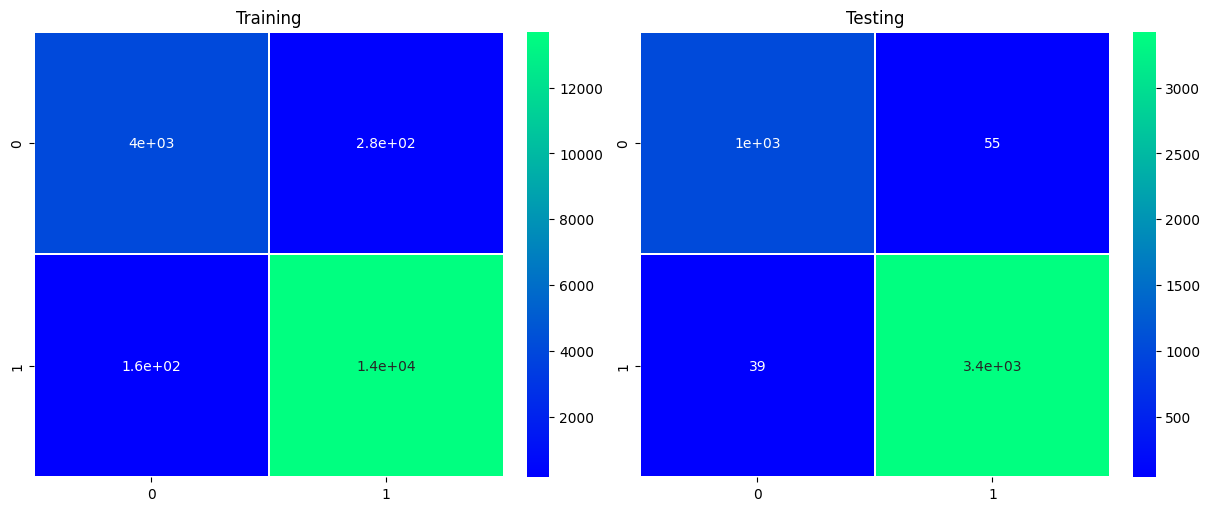

In [31]:
from sklearn.metrics import confusion_matrix, log_loss, classification_report

fig, ax = plt.subplots(1, 2, figsize=(12, 5), layout="constrained")
sns.heatmap(confusion_matrix(y_train, svm.predict(X_train)), annot=True, linewidths=0.2, linecolor="white", cmap="winter", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, svm.predict(X_test)), annot=True, linewidths=0.2, linecolor="white", cmap="winter", ax=ax[1])

ax[0].set_title("Training")
ax[1].set_title("Testing")
plt.show()

In [32]:
print("Training\n", classification_report(y_train, svm.predict(X_train)))

Training
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      4321
           1       0.98      0.99      0.98     13863

    accuracy                           0.98     18184
   macro avg       0.97      0.96      0.97     18184
weighted avg       0.98      0.98      0.98     18184



In [33]:
print("Testing\n", classification_report(y_test, svm.predict(X_test)))

Testing
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      1082
           1       0.98      0.99      0.99      3464

    accuracy                           0.98      4546
   macro avg       0.97      0.97      0.97      4546
weighted avg       0.98      0.98      0.98      4546



In [34]:
tree = DecisionTreeClassifier(max_depth=5, random_state=101)
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=101)

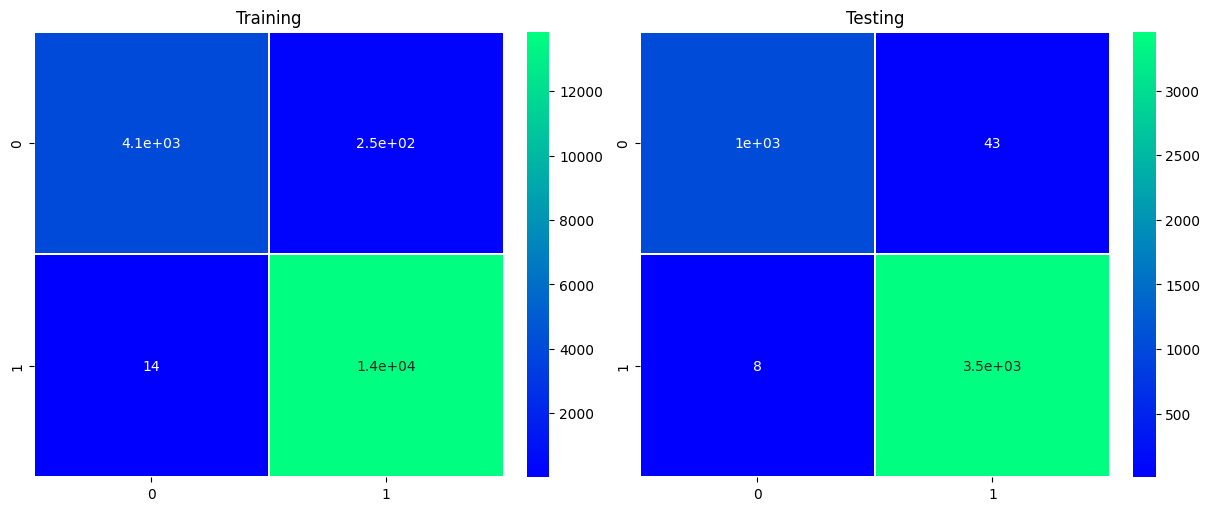

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), layout="constrained")

sns.heatmap(confusion_matrix(y_train, tree.predict(X_train)), annot=True, linewidths=0.2, linecolor="white", cmap="winter", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, tree.predict(X_test)), annot=True, linewidths=0.2, linecolor="white", cmap="winter", ax=ax[1])

ax[0].set_title("Training")
ax[1].set_title("Testing")

plt.show()

In [37]:
print("Training\n", classification_report(y_train, tree.predict(X_train)))


Training
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      4321
           1       0.98      1.00      0.99     13863

    accuracy                           0.99     18184
   macro avg       0.99      0.97      0.98     18184
weighted avg       0.99      0.99      0.99     18184



In [38]:
print("Testing\n", classification_report(y_test, tree.predict(X_test)))

Testing
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      1082
           1       0.99      1.00      0.99      3464

    accuracy                           0.99      4546
   macro avg       0.99      0.98      0.98      4546
weighted avg       0.99      0.99      0.99      4546



In [39]:
naive = GaussianNB().fit(X_train, y_train)


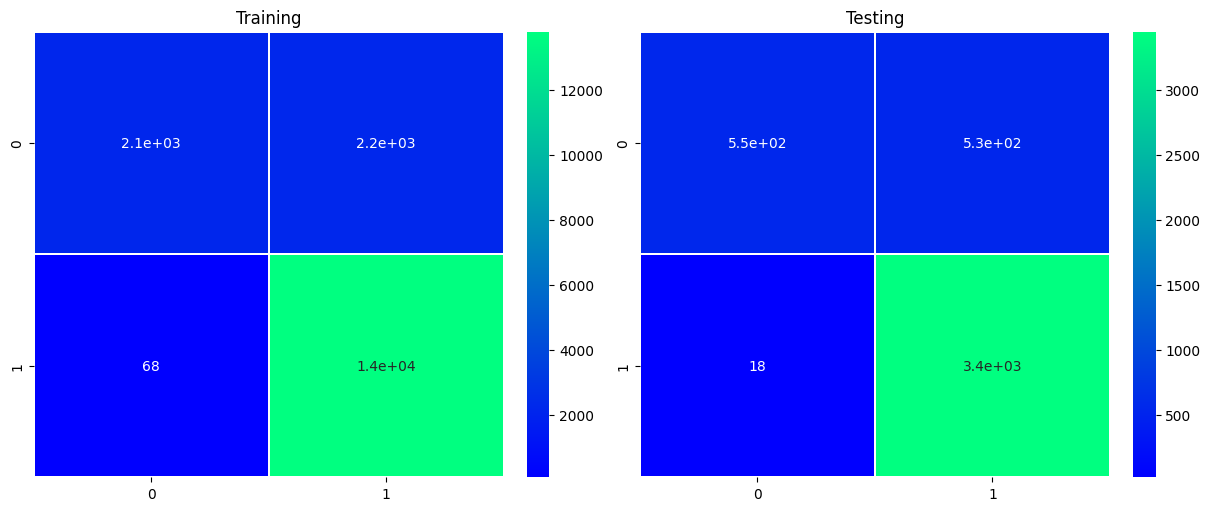

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), layout="constrained")

sns.heatmap(confusion_matrix(y_train, naive.predict(X_train)), annot=True, linewidths=0.2, linecolor="white", cmap="winter", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, naive.predict(X_test)), annot=True, linewidths=0.2, linecolor="white", cmap="winter", ax=ax[1])

ax[0].set_title("Training")
ax[1].set_title("Testing")

plt.show()

In [42]:
print("Training\n", classification_report(y_train, naive.predict(X_train)))

Training
               precision    recall  f1-score   support

           0       0.97      0.49      0.66      4321
           1       0.86      1.00      0.92     13863

    accuracy                           0.88     18184
   macro avg       0.92      0.74      0.79     18184
weighted avg       0.89      0.88      0.86     18184



In [43]:
print("Testing\n", classification_report(y_test, naive.predict(X_test)))

Testing
               precision    recall  f1-score   support

           0       0.97      0.51      0.67      1082
           1       0.87      0.99      0.93      3464

    accuracy                           0.88      4546
   macro avg       0.92      0.75      0.80      4546
weighted avg       0.89      0.88      0.86      4546



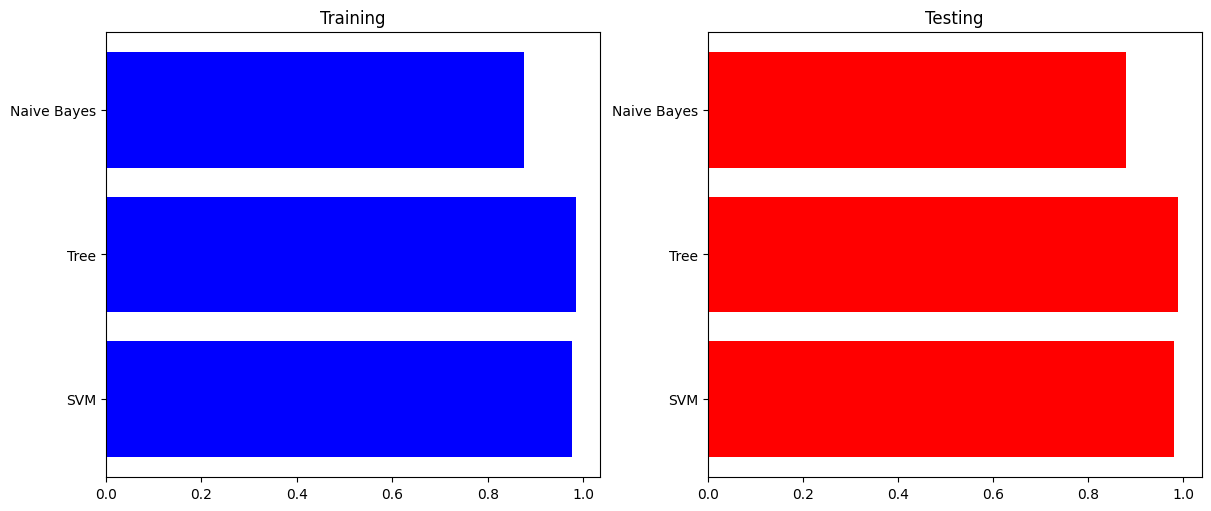

In [47]:
models = [svm, tree, naive]
fig, ax = plt.subplots(1, 2, figsize=(12, 5), layout="constrained")

ax[0].barh(["SVM", "Tree", "Naive Bayes"], [i.score(X_train, y_train) for i in models], color="b")
ax[1].barh(["SVM", "Tree", "Naive Bayes"], [i.score(X_test, y_test) for i in models], color="r")

ax[0].set_title("Training")
ax[1].set_title("Testing")

plt.show()

In [77]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [78]:
centroids = kmeans.cluster_centers_
label = kmeans.predict(X_train)


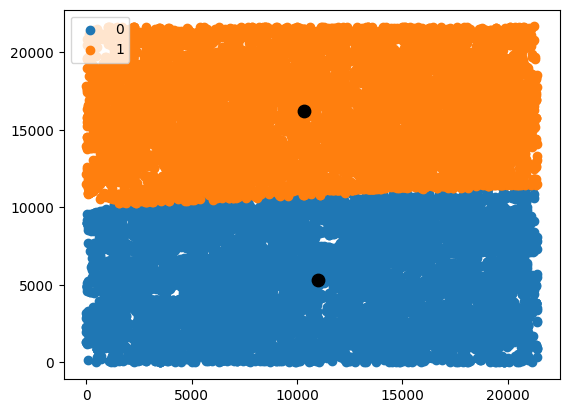

In [80]:
for i in np.unique(label):
    plt.scatter(X_train.values[label==i, 0], X_train.values[label==i, 1], label=i)
plt.scatter(centroids[:, 0], centroids[:, 1], s=80, color="k")
plt.legend()
plt.show()

In [86]:
from sklearn import metrics
print(f"Homogeneity: {metrics.homogeneity_score(y_train, label):.3f}")
print(f"Completeness: {metrics.completeness_score(y_train, label):.3f}")
print(f"V-measure: {metrics.v_measure_score(y_train, label):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y_train, label):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(y_train, label):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X_train, label):.3f}")

Homogeneity: 0.088
Completeness: 0.070
V-measure: 0.078
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.078
Silhouette Coefficient: 0.358


In [87]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, min_samples=2).fit(X_train)


In [88]:
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 172
Estimated number of noise points: 17810


In [89]:
print(f"Homogeneity: {metrics.homogeneity_score(y_train, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(y_train, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(y_train, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y_train, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(y_train, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X_train, labels):.3f}")

Homogeneity: 0.029
Completeness: 0.076
V-measure: 0.042
Adjusted Rand Index: 0.021
Adjusted Mutual Information: 0.027
Silhouette Coefficient: -0.871


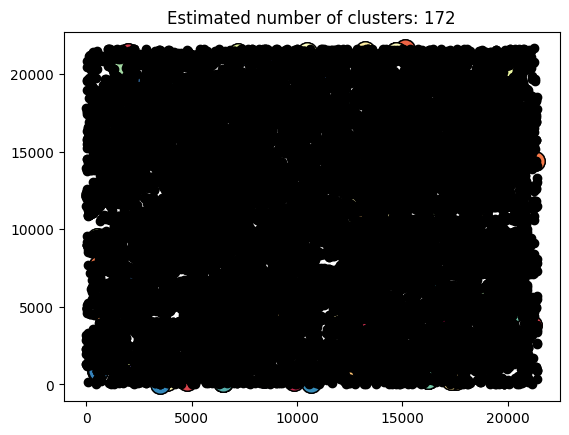

In [91]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X_train.values[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X_train.values[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

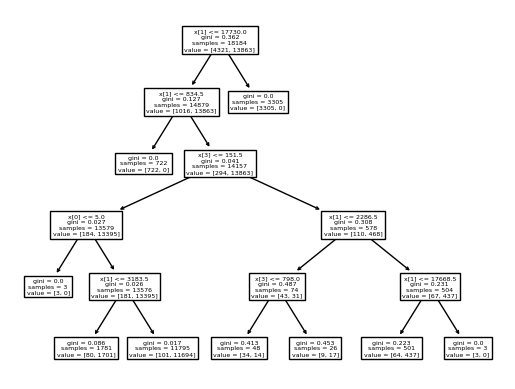

In [92]:
from sklearn.tree import plot_tree

plot_tree(tree)
plt.show()